<a href="https://colab.research.google.com/github/Prerana-Bijekar/DL/blob/main/Practical-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 1: Load and preprocess MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values (0-255 -> 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Step 2: Build simple neural network model
model = Sequential([
  Flatten(input_shape=(28, 28)), # Input layer (28x28 -> 784)
  Dense(128, activation='relu'), # Hidden layer
  Dense(64, activation='relu'), # Hidden layer
  Dense(10, activation='softmax') # Output layer (10 classes)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Step 3: Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Step 4: Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=2)

Epoch 1/10
422/422 - 4s - 9ms/step - accuracy: 0.9032 - loss: 0.3448 - val_accuracy: 0.9618 - val_loss: 0.1354
Epoch 2/10
422/422 - 3s - 6ms/step - accuracy: 0.9578 - loss: 0.1420 - val_accuracy: 0.9718 - val_loss: 0.0985
Epoch 3/10
422/422 - 4s - 8ms/step - accuracy: 0.9702 - loss: 0.0979 - val_accuracy: 0.9735 - val_loss: 0.0941
Epoch 4/10
422/422 - 3s - 7ms/step - accuracy: 0.9781 - loss: 0.0737 - val_accuracy: 0.9758 - val_loss: 0.0821
Epoch 5/10
422/422 - 5s - 11ms/step - accuracy: 0.9824 - loss: 0.0582 - val_accuracy: 0.9788 - val_loss: 0.0821
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.9857 - loss: 0.0468 - val_accuracy: 0.9783 - val_loss: 0.0841
Epoch 7/10
422/422 - 4s - 8ms/step - accuracy: 0.9880 - loss: 0.0385 - val_accuracy: 0.9778 - val_loss: 0.0808
Epoch 8/10
422/422 - 2s - 6ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9805 - val_loss: 0.0756
Epoch 9/10
422/422 - 3s - 6ms/step - accuracy: 0.9922 - loss: 0.0254 - val_accuracy: 0.9798 - val_loss: 0.0819


In [8]:
# Step 5: Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.9750999808311462


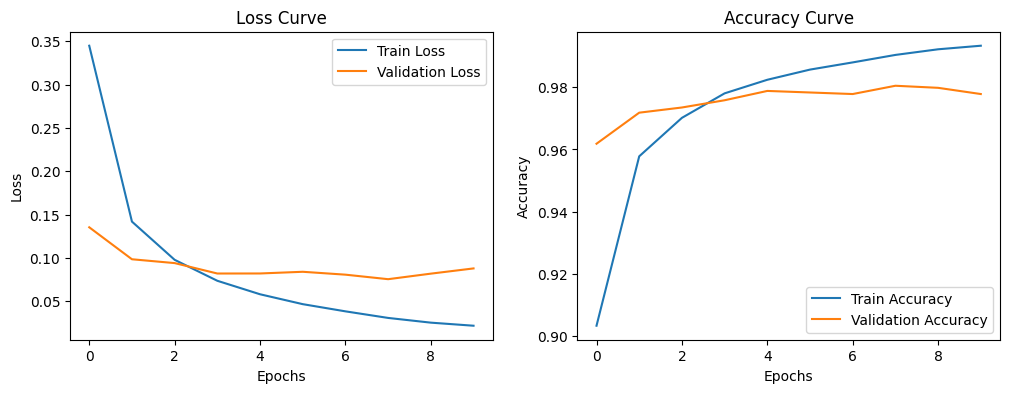

In [9]:
# Step 6: Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()